In [2]:
# Importanto bibliotecas do Panda e Matplotlib
import pandas as pd                  # importando a biblioteca Pandas e associando ao acrônimo pd
# Buscando a biblioteca de plotagem para customizar os gráficos
import matplotlib.pyplot as plt      # Importanto a biblioteca Matplotlib e associando ao acrônimo plt
plt.style.use("seaborn-v0_8")        # Setamos o estilo da visualização do gráfico a ser apresentado

In [3]:
# Criando o DataFrame com os dados do arquivo em Excel
df = pd.read_excel("./datasets/AdventureWorks.xlsx")

In [4]:
# Visualizando as 5 peimeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
# Analisando a quantidade de linhas e colunas dessa base de dados
df.shape      # Resultado em (Linhas, Colunas)

(904, 16)

In [6]:
# Verificando os tipos de dados contidos na base de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [7]:
# Qual a receita total?
df["Valor Venda"].sum()    # Some todos os valores contidos no campo Valor Venda

5984606.1426

In [8]:
# Qual o custo total (Custo unitário x Qtde.)?
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"])   # Criando a coluna custo e inserindo os dados nela

In [9]:
# Retorne apenas a primeira linha da tabela com a nova coluna Custo
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [10]:
# Qual o somatório do Custo total
round(df["Custo"].sum(), 2)      # Arredonde e retorne o somatório do custo total com apenas 2 casas decimais

2486783.05

In [11]:
# Agora temos a receita, custo e custo total, podemos achar o lucro total
# Vamos criar uma coluna lucro que será a Receita - Custo
df["Lucro"] = df["Valor Venda"] - df["Custo"]

In [12]:
# Retorne apenas a primeira linha da tabela com a nova coluna Lucro
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [13]:
# Qual o somatório do Lucro total
round(df["Lucro"].sum(), 2)      # Arredonde e retorne o somatório do custo total com apenas 2 casas decimais

3497823.09

In [14]:
# Criando uma coluna com total de dias para enviar o produto
df["Tempo Envio"] = df["Data Envio"] - df["Data Venda"]

In [15]:
# Retorne apenas a primeira linha da tabela com a nova coluna Tempo Envio no formato object
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [16]:
# Agora precisamos saber a média do tempo de envio para cada marca
# Precisamos transformar a coluna Tempo Envio em numérico
# Extraindo apenas os dias, eliminando a palavra "days" de dentro da linha
df["Tempo Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [17]:
# Retorne apenas a primeira linha da tabela com a nova coluna Tempo Envio no formato numérico
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [18]:
# Conferindo o tipo de dado da coluna Tempo Envio se realmente está numérico
df["Tempo Envio"].dtype

dtype('int64')

In [19]:
# Média de tempo de envio por marca
df.groupby("Marca")["Tempo Envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo Envio, dtype: float64

In [20]:
# Verificando se existe valores ausentes na base de dados
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo Envio       0
dtype: int64

In [21]:
# Para saber o Lucro por Ano e Marca
# Agrupo os dados contidos nas colunas Data Venda e Marca
# Faço somatório de todos os valores da coluna Lucro

df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64

In [22]:
# Como acima apresentou uma notação científica nos dados apresentados...
# Utilizamos um recurso para configurar e melhorar a visualização dos dados
pd.options.display.float_format = "{:20,.2f}".format

In [23]:
# Agora obtemos os valores corretos sem notações científicas

df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [24]:
# Armazenando os dados do resultado acima em uma nova variável em um formato de DataFrame
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index() # Resentando o índex e apresentando o formato colunar
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [25]:
# Qual o total de produtos vendidos?
# Agrupando por produto, somando a quantidade e ordenar do maior para o menor
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

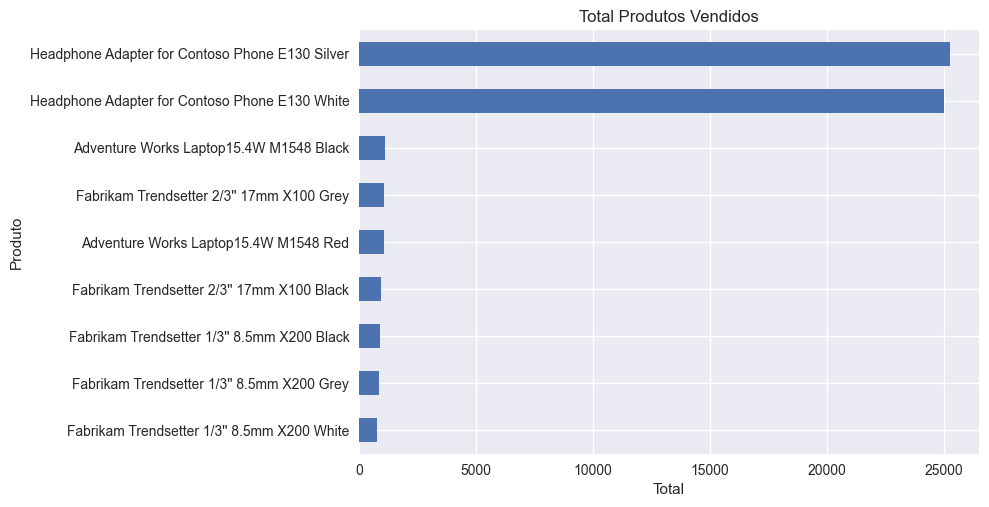

In [26]:
# Apresentando este mesmo resultado em um gráfico
from matplotlib.pyplot import title
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

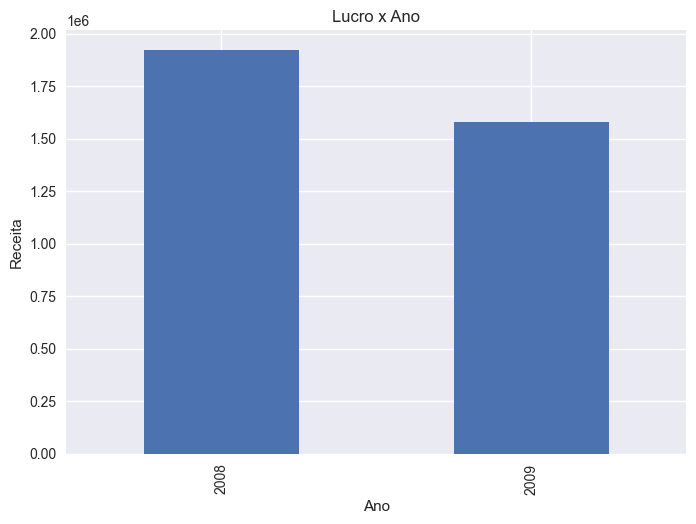

In [27]:
# Apresentando o resultado de Lucro x Ano
from matplotlib.pyplot import title
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [28]:
# Analisando apenas os valores contidos nessa filtragem
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [29]:
# Selecionando apenas os valores de vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [30]:
# Apresentando os 5 primeiros valores da minha variável
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


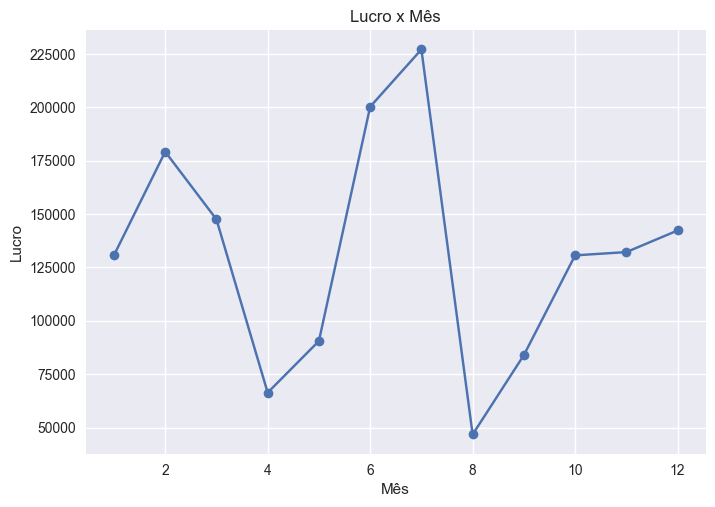

In [31]:
# Criando um gráfico de linhas com marcação em círculos para saber meu lucro por mês
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês", marker="o")
plt.xlabel("Mês")
plt.ylabel("Lucro");

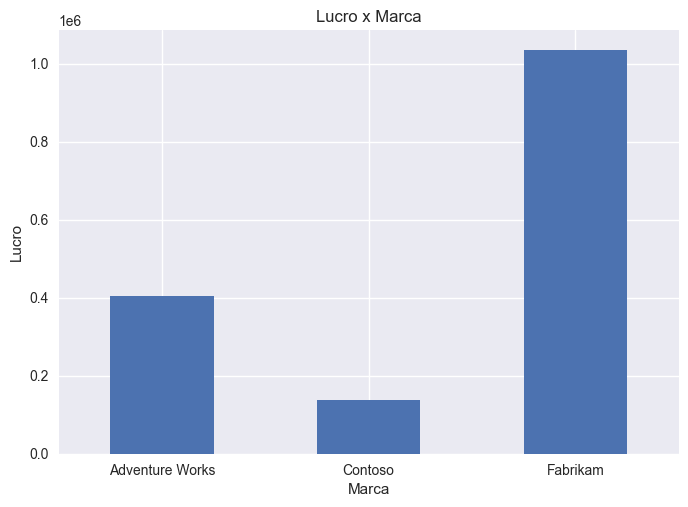

In [32]:
# Criando um gráfico de linhas para saber meu lucro por Marca
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")                     # Label do eixo x
plt.ylabel("Lucro")                     # Label do eixo y
plt.xticks(rotation="horizontal");      # Apresentando os dados do label do eixo x na horizontal

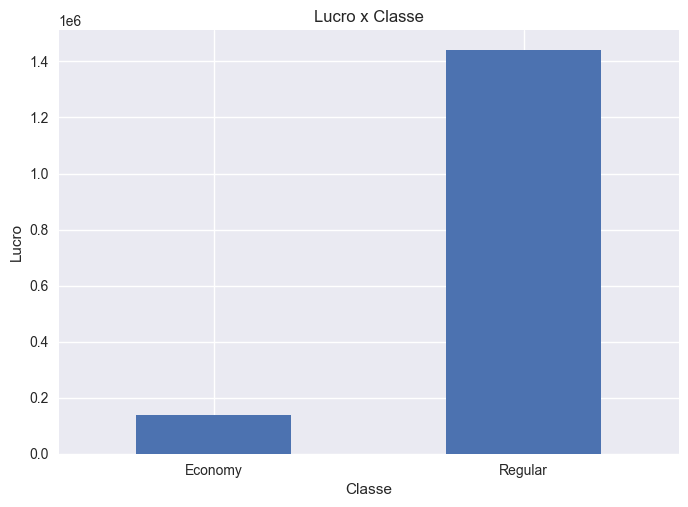

In [33]:
# Criando um gráfico de linhas para saber meu Classe por Lucro
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")                     # Label do eixo x
plt.ylabel("Lucro")                     # Label do eixo y
plt.xticks(rotation="horizontal");      # Apresentando os dados do label do eixo x na horizontal

In [34]:
# Analisando dados específicos como "Tempo Envio"
df["Tempo Envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

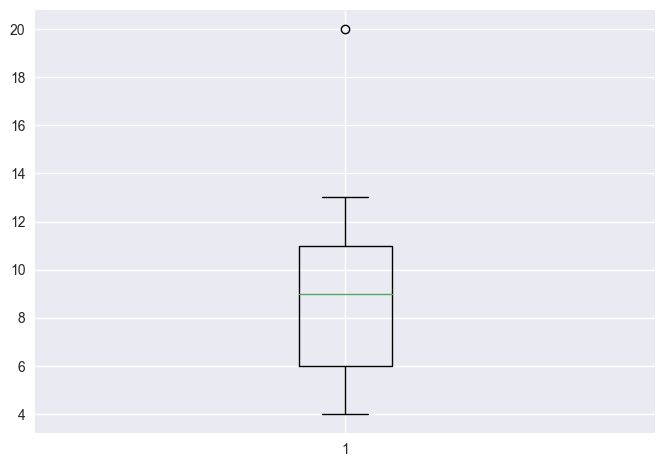

In [35]:
# Gráfico de Boxplot com os dados do Tempo Envio
plt.boxplot(df["Tempo Envio"]);

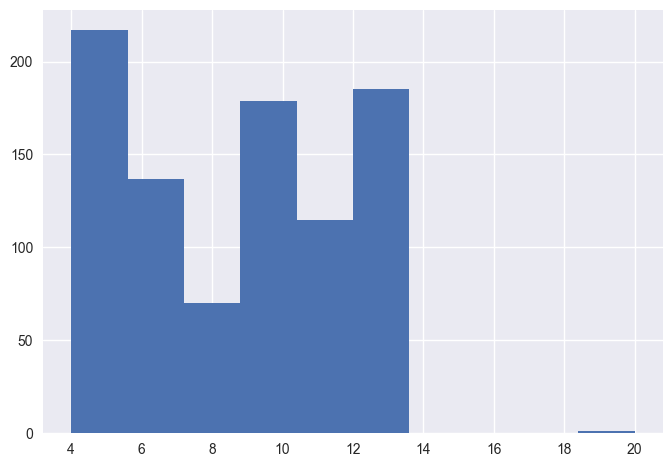

In [37]:
# Histograma com os dados do Tempo Envio
plt.hist(df["Tempo Envio"]);

In [38]:
# Tempo de envio mínimo
df["Tempo Envio"].min()

4

In [39]:
# Tempo máximo de envio
df["Tempo Envio"].max()

20

In [40]:
# Identificando o Outlier
# Apresenta a entrega que mais demorou a ser realizada
df[df["Tempo Envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [41]:
# Criando um arquivo .csv com o conteúdo da análise de dados que fizemos
df.to_csv("df_vendas_novo.csv", index = False)

In [42]:
# Criando um arquivo .xlsx com o conteúdo da análise de dados que fizemos
df.to_excel("df_vendas_novo.xlsx", index = False)